In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

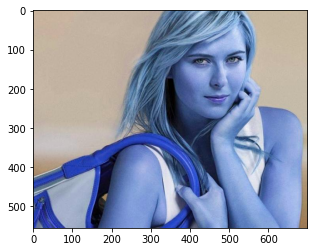

In [4]:
plt.imshow(img)

In [5]:
gray= cv2.cvtColor(img,cv2.COLOR_RGBA2GRAY)
gray.shape

(555, 700)

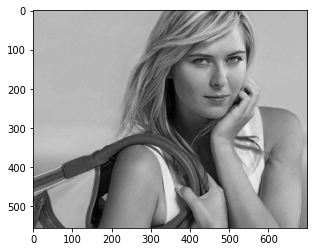

In [8]:
plt.imshow(gray,cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/haarcascade_eye.xml')

faces= face_cascade.detectMultiScale(gray,1.5,5)
faces

array([[333,  23, 273, 273]], dtype=int32)

In [10]:
x,y,w,h = faces[0]

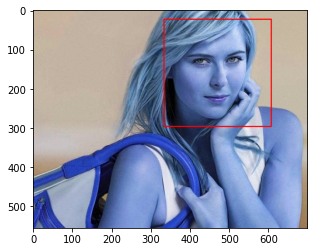

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

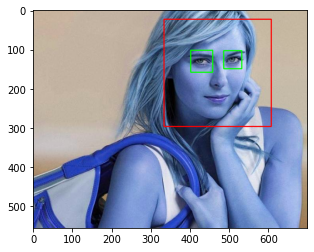

In [15]:
for x,y,w,h in faces:
  face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray = gray[y:y+h,x:x+w]
  roi_color = face_img[y:y+h,x:x+w]
  eyes = eye_cascade.detectMultiScale(roi_gray)
  for ex,ey,ew,eh in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img)
plt.show()

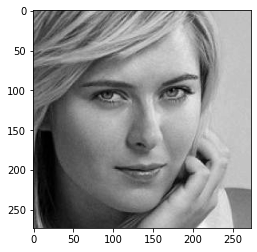

In [16]:
plt.imshow(roi_gray,cmap='gray')

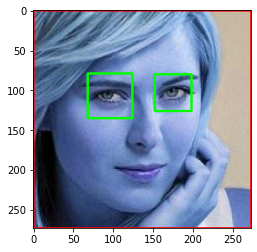

In [17]:
plt.imshow(roi_color,cmap='gray')

In [18]:
def get_cropped_image_if_2_eyes(img_path):
    img=cv2.imread(img_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.5,5)
    for x,y,w,h in faces:
        roi_color=img[y:y+h,x:x+w]
        roi_gray=gray[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if(len(eyes)>=2):
            return roi_color

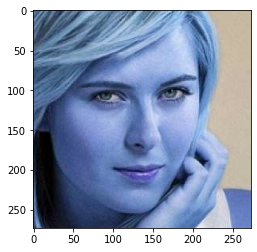

In [19]:
plt.imshow(get_cropped_image_if_2_eyes('/content/drive/MyDrive/Colab Notebooks/test_images/sharapova1.jpg'))

In [20]:
path_to_data = '/content/drive/MyDrive/Colab Notebooks/dataset'
path_to_cropped_data = '/content/drive/MyDrive/Colab Notebooks/dataset/cropped/'

In [21]:
import os

In [22]:
img_dirs = []
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    img_dirs.append(entry.path)

In [23]:
img_dirs

['/content/drive/MyDrive/Colab Notebooks/dataset/virat_kohli',
 '/content/drive/MyDrive/Colab Notebooks/dataset/serena_williams',
 '/content/drive/MyDrive/Colab Notebooks/dataset/roger_federer',
 '/content/drive/MyDrive/Colab Notebooks/dataset/maria_sharapova',
 '/content/drive/MyDrive/Colab Notebooks/dataset/lionel_messi']

In [24]:
import shutil
if os.path.exists(path_to_cropped_data):
  shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [25]:
cropped_img_dirs=[]
celebrity_file_name_dictionary={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    
    celebrity_file_name_dictionary[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cropped_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
            cropped_file_name = celebrity_name+str(count)+'.png'
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_name_dictionary[celebrity_name].append(cropped_file_path)
            count=count+1

In [26]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

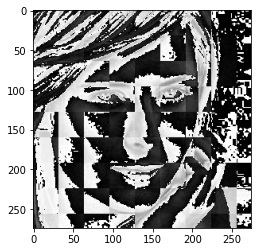

In [28]:
im_har = w2d(get_cropped_image_if_2_eyes('/content/drive/MyDrive/Colab Notebooks/test_images/sharapova1.jpg'),'db1',5)
plt.imshow(im_har, cmap='gray')

In [29]:
celebrity_file_name_dictionary

{'lionel_messi': ['/content/drive/MyDrive/Colab Notebooks/dataset/cropped/lionel_messi/lionel_messi1.png',
  '/content/drive/MyDrive/Colab Notebooks/dataset/cropped/lionel_messi/lionel_messi2.png',
  '/content/drive/MyDrive/Colab Notebooks/dataset/cropped/lionel_messi/lionel_messi3.png',
  '/content/drive/MyDrive/Colab Notebooks/dataset/cropped/lionel_messi/lionel_messi4.png',
  '/content/drive/MyDrive/Colab Notebooks/dataset/cropped/lionel_messi/lionel_messi5.png',
  '/content/drive/MyDrive/Colab Notebooks/dataset/cropped/lionel_messi/lionel_messi6.png',
  '/content/drive/MyDrive/Colab Notebooks/dataset/cropped/lionel_messi/lionel_messi7.png',
  '/content/drive/MyDrive/Colab Notebooks/dataset/cropped/lionel_messi/lionel_messi8.png',
  '/content/drive/MyDrive/Colab Notebooks/dataset/cropped/lionel_messi/lionel_messi9.png',
  '/content/drive/MyDrive/Colab Notebooks/dataset/cropped/lionel_messi/lionel_messi10.png',
  '/content/drive/MyDrive/Colab Notebooks/dataset/cropped/lionel_messi/li

In [30]:
count = 0;
class_dic={}
for celebrity_name in celebrity_file_name_dictionary.keys():
    class_dic[celebrity_name]=count
    count+=1
class_dic

{'lionel_messi': 4,
 'maria_sharapova': 3,
 'roger_federer': 2,
 'serena_williams': 1,
 'virat_kohli': 0}

In [33]:
X=[]
y=[]
for celebrity_name,training_files in celebrity_file_name_dictionary.items():
    for training_images in training_files:
        img=cv2.imread(training_images)
        if img is None:
            continue
        scalled_raw_image = cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_image.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dic[celebrity_name])

In [34]:
len(X)

138

In [35]:
len(y)

138

In [36]:
X[0]

array([[20],
       [22],
       [23],
       ...,
       [26],
       [50],
       [51]], dtype=uint8)

In [37]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(138, 4096)

In [38]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [40]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7142857142857143

In [41]:
import pickle
with open("Face_Recognition_Model.pickle","wb") as f:
  pickle.dump(pipe,f)

In [43]:
import json
with open("class_dictionary.json","w") as f:
  f.write(json.dumps(class_dic))